In [70]:
import qiskit.tools.jupyter
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram
quantum_h_adder = QuantumCircuit(4,2)

In [71]:
quantum_h_adder.x(0)
#quantum_h_adder.x(1)

In [72]:
quantum_h_adder.barrier()
quantum_h_adder.cx(0,2)
quantum_h_adder.cx(1,2)
quantum_h_adder.ccx(0,1,3)
quantum_h_adder.barrier()

In [73]:
quantum_h_adder.measure(2,0)
quantum_h_adder.measure(3,1)
quantum_h_adder.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     └───┘ ░   │         │   ░       
q_1: ──────░───┼────■────■───░───────
           ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

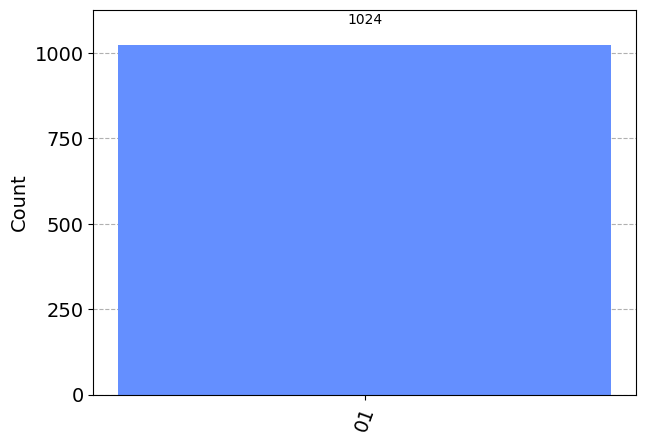

In [74]:
qobj = assemble(quantum_h_adder)
sim = Aer.get_backend('aer_simulator')
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)